In [1]:
# need to connect to db
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

Created snorkel session from  postgres:///snorkel25similar


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
import random

In [3]:
from  sqlalchemy.sql.expression import func, select

In [4]:
# Sample from db

num_samples = 10

random_train_cands = []
random_unlab_cands = []

q_train = session.query(REGULATOR).filter(REGULATOR.split == 0)
q_unlab = session.query(REGULATOR).filter(REGULATOR.split == 3)

for i in range(num_samples):
    
    random_train_cands = q_train.order_by(func.random()).limit(num_samples).all()
    random_unlab_cands = q_unlab.order_by(func.random()).limit(num_samples).all()
    


In [5]:
# Helper functions for querying from db

def get_document(cand):
    return cand.get_parent().get_parent()

def get_document_id(cand):
    return get_document(cand).name


def get_document_title(cand):
    return get_document(cand).get_children()[0].text

In [6]:
for title in map(lambda x: get_document_title(x), random_train_cands):
    print title,'\n'

H3 histamine receptor agonist inhibits biliary growth of BDL rats by downregulation of the cAMP-dependent PKA/ERK1/2/ELK-1 pathway.	

Glutathione peroxidases and redox-regulated transcription factors.	

Substrate specificity of the human renal sodium dicarboxylate cotransporter, hNaDC-3, under voltage-clamp conditions.	

Preclinical pharmacokinetics and in vitro metabolism of dasatinib (BMS-354825): a potent oral multi-targeted kinase inhibitor against SRC and BCR-ABL.	

Neurochemical effects of the monoamine oxidase inhibitor phenelzine on brain GABA and alanine: A comparison with vigabatrin.	

Bioactive flavaglines and other constituents isolated from Aglaia perviridis.	

NHE3 inhibition activates duodenal bicarbonate secretion in the rat.	

The inhibitory effect of sodium nitroprusside on HIF-1 activation is not dependent on nitric oxide-soluble guanylyl cyclase pathway.	

The effects of adulthood olanzapine treatment on cognitive performance and neurotrophic factor content in male 

In [7]:
for title in map(lambda x: get_document_title(x), random_unlab_cands):
    print title,'\n'

Inhibitory effect of dithiothreitol on angiotensin II-induced contractions mediated by AT1-receptors in rat portal vein and rabbit aorta.


BAY 43-9006 exhibits broad spectrum oral antitumor activity and targets the RAF/MEK/ERK pathway and receptor tyrosine kinases involved in tumor progression and angiogenesis.
The RAS/RAF signaling pathway is an important mediator of tumor cell proliferation and angiogenesis. 

Comparative analysis of different puberty inhibiting mechanisms of two GnRH agonists and the GnRH antagonist cetrorelix using a female rat model.


A novel antithrombotic effect of sulforaphane via activation of platelet adenylate cyclase: ex vivo and in vivo studies.


Studies on the mechanism responsible for thyrotropin-induced expression of microsomal/peroxidase antigen in FRTL-5 cells.


Factors affecting warfarin dose requirements and quality of anticoagulation in adult Egyptian patients: role of gene polymorphism.


Antihyperglycemic effect of fraxetin on hepatic key enz

### Try to find categories in pubmed

** Exploratory part for categories of PubMed **

In [8]:
id = get_document_id(random_train_cands[8])

In [9]:
from Bio import Entrez

Entrez.email = "amkrasakis@gmail.com"

In [10]:
id

u'17067304'

In [11]:
handle = Entrez.efetch(db="pubmed", id=int(id),  rettype="xml")
records = Entrez.read(handle)


In [12]:
records.keys()

[u'PubmedArticle', u'PubmedBookArticle']

In [13]:
from pprint import pprint

In [14]:
records['PubmedArticle'][0]['MedlineCitation'].keys()

[u'OtherID',
 u'DateRevised',
 u'MeshHeadingList',
 u'OtherAbstract',
 u'CitationSubset',
 u'ChemicalList',
 u'KeywordList',
 u'DateCompleted',
 u'SpaceFlightMission',
 u'GeneralNote',
 u'Article',
 u'PMID',
 u'MedlineJournalInfo']

In [15]:
records['PubmedArticle'][0]['MedlineCitation'].keys()

[u'OtherID',
 u'DateRevised',
 u'MeshHeadingList',
 u'OtherAbstract',
 u'CitationSubset',
 u'ChemicalList',
 u'KeywordList',
 u'DateCompleted',
 u'SpaceFlightMission',
 u'GeneralNote',
 u'Article',
 u'PMID',
 u'MedlineJournalInfo']

In [16]:
# Explore structure 


# for key in records['PubmedArticle'][0]['MedlineCitation'].keys():
#     print key
#     print records['PubmedArticle'][0]['MedlineCitation'][key]
#     print '\n'

In [17]:
id

u'17067304'

** Apply in all training docs **

In [18]:
# load pubmed ids
import pickle

In [24]:
with open("/home/antonis/data/biocreative6/pubmed_ids_similar25.pickle", 'rb') as f:
    pubmed_ids = pickle.load(f)
pubmed_ids_train = pubmed_ids['train']
with open("/home/antonis/data/biocreative6/pubmed_ids_5e7similarity.pickle", 'rb') as f:
    pubmed_ids_5e7similar = pickle.load(f)

In [ ]:
# Merge them into list, query with efetch

In [34]:
','.join(pubmed_ids_train[:3])

'15357957,17049513,12183670'

In [39]:
for i in range(0,len(pubmed_ids_train),199):
    print i,i+199

0 199
199 398


In [ ]:

for n in pubmed_ids_train[:3]:
    

In [50]:
'18465538' in pubmed_ids_train

True

In [48]:
record

{u'MedlineCitation': DictElement({u'OtherID': [], u'DateRevised': {u'Month': '05', u'Day': '09', u'Year': '2008'}, u'OtherAbstract': [], u'CitationSubset': [], u'KeywordList': [], u'DateCompleted': {u'Month': '06', u'Day': '09', u'Year': '2010'}, u'SpaceFlightMission': [], u'GeneralNote': [], u'Article': DictElement({u'ArticleDate': [], u'Pagination': {u'MedlinePgn': '241-6'}, u'AuthorList': ListElement([DictElement({u'LastName': 'Zvelebil', u'Initials': 'MJ', u'Identifier': [], u'AffiliationInfo': [{u'Affiliation': 'Ludwig Institute for Cancer Research, Courtauld Building, 91 Riding House Street, London, W1P 8BT, UK. marketa@ludwig.ucl.ac.uk', u'Identifier': []}], u'ForeName': 'M J'}, attributes={u'ValidYN': u'Y'})], attributes={u'CompleteYN': u'Y'}), u'Language': ['eng'], u'PublicationTypeList': [StringElement('Journal Article', attributes={u'UI': u'D016428'})], u'Journal': {u'ISSN': StringElement('1369-7056', attributes={u'IssnType': u'Print'}), u'ISOAbbreviation': 'IDrugs', u'Journ

In [45]:
record['MedlineCitation']['Article']

DictElement({u'ArticleDate': [], u'Pagination': {u'MedlinePgn': '241-6'}, u'AuthorList': ListElement([DictElement({u'LastName': 'Zvelebil', u'Initials': 'MJ', u'Identifier': [], u'AffiliationInfo': [{u'Affiliation': 'Ludwig Institute for Cancer Research, Courtauld Building, 91 Riding House Street, London, W1P 8BT, UK. marketa@ludwig.ucl.ac.uk', u'Identifier': []}], u'ForeName': 'M J'}, attributes={u'ValidYN': u'Y'})], attributes={u'CompleteYN': u'Y'}), u'Language': ['eng'], u'PublicationTypeList': [StringElement('Journal Article', attributes={u'UI': u'D016428'})], u'Journal': {u'ISSN': StringElement('1369-7056', attributes={u'IssnType': u'Print'}), u'ISOAbbreviation': 'IDrugs', u'JournalIssue': DictElement({u'Volume': '1', u'Issue': '2', u'PubDate': {u'Month': 'Jun', u'Year': '1998'}}, attributes={u'CitedMedium': u'Print'}), u'Title': 'IDrugs : the investigational drugs journal'}, u'ArticleTitle': 'Flavopiridol Hoechst AG.', u'ELocationID': [], u'Abstract': {u'AbstractText': ['Hoechst 

In [55]:
a = record['MedlineCitation']['PMID'].title()

In [59]:
import time

** Training data **

In [71]:
# initialize empty list
Qualifiers_MT = []
Descriptors_MT = []
st_time = time.time()

for i in range(0,len(pubmed_ids_train),199):
    print 'Getting headings for docs %i to %i ... '%(i,i+199)
    time_elapsed = time.time()-st_time #since previous api call
    time.sleep(max(0,0.34 - time_elapsed )) # PubMed requires 3 requests / call
    
    #try in bunches
    ids = ','.join(pubmed_ids_train[i:i+199])
#     print ids
    handle = Entrez.efetch(db="pubmed", id=ids,  rettype="xml")
    st_time = time.time()
    
    records = Entrez.read(handle)
    # should work for many 
    for record in records['PubmedArticle']: # for each article retrieved in the list
        try:
            for meshheading in record['MedlineCitation']['MeshHeadingList']:
                for qualifier in meshheading['QualifierName']:

                    if qualifier.attributes['MajorTopicYN']=='Y':
                        Qualifiers_MT.append(qualifier.title())

                descriptor = meshheading['DescriptorName']
                d = descriptor
                if descriptor.attributes['MajorTopicYN']=='Y':
                    Descriptors_MT.append(descriptor.title())

    #             print meshheading,'\n'
        except:
            print "\nrecord['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid ", record['MedlineCitation']['PMID'].title() 
            

Getting headings for docs 0 to 199 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  18465538

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19337422

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23641685

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23580394

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23397359
Getting headings for docs 199 to 398 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22890749

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21475861
Getting headings for docs 398 to 597 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23419036

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23474645

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  15932636

recor

In [77]:
import pandas as pd

In [80]:
len(Qualifiers_MT)

5661

In [ ]:
pubmed_ids_5e7similar

** Unlabeled data similar docs w similarity > 5e7similar **

In [183]:
def get_qualifier_descriptors_headings(pubmed_ids):
    
    # initialize empty list
    Qualifiers_MT = []
    Descriptors_MT = []
    st_time = time.time()

    for i in range(0,len(pubmed_ids),199):
        print 'Getting headings for docs %i to %i ... '%(i,i+199)
        time_elapsed = time.time()-st_time #since previous api call
        time.sleep(max(0,0.34 - time_elapsed )) # PubMed requires 3 requests / call

        #try in bunches
        pubmed_ids = [str(x) for x in pubmed_ids]
        ids = ','.join(pubmed_ids[i:i+199])
    #     print ids
        handle = Entrez.efetch(db="pubmed", id=ids,  rettype="xml")
        st_time = time.time()

        records = Entrez.read(handle)
        # should work for many 
        for record in records['PubmedArticle']: # for each article retrieved in the list
            Qualifiers_MT_new = [] # keep it seperately to avoid double adding the same headings twice per article
            Descriptors_MT_new = [] 
            try:
                for meshheading in record['MedlineCitation']['MeshHeadingList']:
                    for qualifier in meshheading['QualifierName']:

                        if qualifier.attributes['MajorTopicYN']=='Y':
                            Qualifiers_MT_new.append(qualifier.title())
                
                    descriptor = meshheading['DescriptorName']
                    d = descriptor
                    if descriptor.attributes['MajorTopicYN']=='Y':
                        Descriptors_MT_new.append(descriptor.title())

                # avoid double-adding a descriptor/qualifier more than once per doc
                Qualifiers_MT_new = list(set(Qualifiers_MT_new))
                Qualifiers_MT.extend(Qualifiers_MT_new)
                
                Descriptors_MT_new = list(set(Descriptors_MT_new))
                Descriptors_MT.extend(Descriptors_MT_new)
        #             print meshheading,'\n'
       
            except:
                print "\nrecord['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid ", record['MedlineCitation']['PMID'].title() 
    return Qualifiers_MT, Descriptors_MT

In [191]:
Qualifiers_MT_train, Descriptors_MT_train = get_qualifier_descriptors_headings(pubmed_ids['train'])

Getting headings for docs 0 to 199 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  18465538

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19337422

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23641685

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23580394

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23397359
Getting headings for docs 199 to 398 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22890749

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21475861
Getting headings for docs 398 to 597 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23419036

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23474645

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  15932636

recor

In [192]:
Qualifiers_MT_sim5e7, Descriptors_MT_sim5e7 = get_qualifier_descriptors_headings(pubmed_ids_5e7similar)

Getting headings for docs 0 to 199 ... 
Getting headings for docs 199 to 398 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22778522

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  29351460

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  29262858
Getting headings for docs 398 to 597 ... 
Getting headings for docs 597 to 796 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19434887
Getting headings for docs 796 to 995 ... 
Getting headings for docs 995 to 1194 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  29477299
Getting headings for docs 1194 to 1393 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  26393402
Getting headings for docs 1393 to 1592 ... 
Getting headings for docs 1592 to 1791 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  16232477
Getting 

In [193]:
Qualifiers_MT_test, Descriptors_MT_test = get_qualifier_descriptors_headings(pubmed_ids['test_gs'])

Getting headings for docs 0 to 199 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23626400

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19920913

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19300583

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23441017

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23398572
Getting headings for docs 199 to 398 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23343565

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23223414

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23640471

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23362838
Getting headings for docs 398 to 597 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20204178

recor

In [194]:
Qualifiers_MT_25sim, Descriptors_MT_25sim = get_qualifier_descriptors_headings(pubmed_ids['similar25'])

Getting headings for docs 0 to 199 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  25665838
Getting headings for docs 199 to 398 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21158482

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  23062960
Getting headings for docs 398 to 597 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  28680664
Getting headings for docs 597 to 796 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  12616289

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21541623

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  24080956

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  29302957
Getting headings for docs 796 to 995 ... 


HTTPError: HTTP Error 502: Bad Gateway

In [196]:
Qualifiers_MT_outg, Descriptors_MT_outg = get_qualifier_descriptors_headings(pubmed_ids['outgoing_citations'])

Getting headings for docs 0 to 199 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  15892894

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21132100
Getting headings for docs 199 to 398 ... 
Getting headings for docs 398 to 597 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20020719

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20684570
Getting headings for docs 597 to 796 ... 
Getting headings for docs 796 to 995 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  17710197

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19478902

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19478903
Getting headings for docs 995 to 1194 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19587853

record['MedlineCitation']['MeshHeadingList'] NOT FOU


record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21448257

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19590712
Getting headings for docs 7761 to 7960 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  12010462

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  10684459
Getting headings for docs 7960 to 8159 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19543462

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  11091101

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  24226387
Getting headings for docs 8159 to 8358 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  11862224

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  11667533

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  1964456


record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20723261
Getting headings for docs 14726 to 14925 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20485531
Getting headings for docs 14925 to 15124 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  18533695
Getting headings for docs 15124 to 15323 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  14765207

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21516138

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  18385822

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  15535564

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20015351

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22443621

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  2


record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21344069

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  20955607
Getting headings for docs 20895 to 21094 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  17565413
Getting headings for docs 21094 to 21293 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  19826624

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  21822453
Getting headings for docs 21293 to 21492 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  16992821

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22279513
Getting headings for docs 21492 to 21691 ... 

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  22432049

record['MedlineCitation']['MeshHeadingList'] NOT FOUND in article with pmid  15299456
Getting headings for docs 21691 t

In [204]:
len(Qualifiers_MT_sim5e7)

14958

In [91]:
len(Qualifiers_MT_sim5e7)

27155

In [142]:
#####

In [205]:
Qualifiers = pd.DataFrame()
Qualifiers['train'] = pd.Series(Qualifiers_MT_train).value_counts()
Qualifiers['test'] = pd.Series(Qualifiers_MT_test).value_counts()

Qualifiers['Top 25 similar'] = pd.Series(Qualifiers_MT_25sim).value_counts()
Qualifiers['similarity > 5e7'] = pd.Series(Qualifiers_MT_sim5e7).value_counts()

Qualifiers['outg_citations'] = pd.Series(Qualifiers_MT_outg).value_counts()

In [206]:
Qualifiers.fillna(0,inplace=True)

In [213]:
from sklearn.preprocessing import normalize

Qualifiers_norm = normalize(Qualifiers, norm='l1', axis=0)
Qualifiers_norm = pd.DataFrame(Qualifiers_norm, index=Qualifiers.index, columns=Qualifiers.columns)

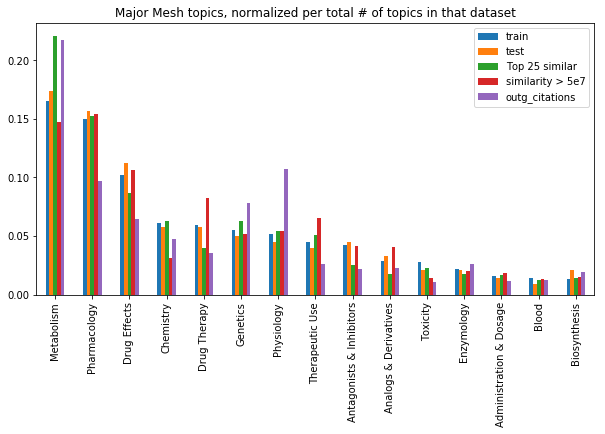

In [214]:
Qualifiers_norm.iloc[:15,:].plot(kind='bar',figsize=(10,5), title = 'Major Mesh topics, normalized per total # of topics in that dataset')

In [215]:
from copy import deepcopy

In [216]:
float(len(pubmed_ids_5e7similar))

5650.0

In [226]:
float(len(pubmed_ids['outgoing_citations']))

22251.0

In [227]:
 float(len(pubmed_ids_5e7similar))

5650.0

In [229]:
Qualifiers

,train,test,Top 25 similar,similarity > 5e7,outg_citations
Metabolism,547,335.0,38042,2202.0,10009
Pharmacology,496,302.0,26285,2301.0,4465
Drug Effects,338,217.0,14924,1588.0,2971
Chemistry,203,111.0,10775,466.0,2185
Drug Therapy,197,112.0,6806,1224.0,1617
Genetics,182,96.0,10874,773.0,3602
Physiology,172,86.0,9297,806.0,4931
Therapeutic Use,149,77.0,8770,971.0,1214
Antagonists & Inhibitors,141,86.0,4358,613.0,1003
Analogs & Derivatives,95,63.0,3031,612.0,1035


In [230]:
 Qualifiers['train'] / float(len(pubmed_ids['train']))

Metabolism                     0.412519
Pharmacology                   0.374057
Drug Effects                   0.254902
Chemistry                      0.153092
Drug Therapy                   0.148567
Genetics                       0.137255
Physiology                     0.129713
Therapeutic Use                0.112368
Antagonists & Inhibitors       0.106335
Analogs & Derivatives          0.071644
Toxicity                       0.069382
Enzymology                     0.053544
Administration & Dosage        0.039216
Blood                          0.035445
Biosynthesis                   0.033183
Methods                        0.032428
Prevention & Control           0.030166
Pathology                      0.028658
Pharmacokinetics               0.027903
Adverse Effects                0.024133
Physiopathology                0.021870
Chemical Synthesis             0.020362
Cytology                       0.019608
Analysis                       0.017345
Immunology                     0.016591


In [233]:
# Qualifiers_norm_per_articles = deepcopy(Qualifiers)
Qualifiers_norm_per_articles['train'] = Qualifiers['train'] / float(len(pubmed_ids['train']))
Qualifiers_norm_per_articles['test'] = Qualifiers['test'] / float(len(pubmed_ids['test_gs']))

Qualifiers_norm_per_articles['Top 25 similar'] = Qualifiers['Top 25 similar'] / float(len(pubmed_ids['similar25']))
Qualifiers_norm_per_articles['outg_citations'] = Qualifiers['outg_citations'] / float(len(pubmed_ids['outgoing_citations']))
Qualifiers_norm_per_articles['similarity > 5e7'] = Qualifiers['similarity > 5e7'] / float(len(pubmed_ids_5e7similar))


In [235]:
Qualifiers_norm_per_articles

,train,test,Top 25 similar,similarity > 5e7,outg_citations
Metabolism,0.412519,0.41875,0.992979,0.389735,0.449822
Pharmacology,0.374057,0.37750,0.686095,0.407257,0.200665
Drug Effects,0.254902,0.27125,0.389549,0.281062,0.133522
Chemistry,0.153092,0.13875,0.281251,0.082478,0.098198
Drug Therapy,0.148567,0.14000,0.177651,0.216637,0.072671
Genetics,0.137255,0.12000,0.283835,0.136814,0.161880
Physiology,0.129713,0.10750,0.242672,0.142655,0.221608
Therapeutic Use,0.112368,0.09625,0.228916,0.171858,0.054559
Antagonists & Inhibitors,0.106335,0.10750,0.113753,0.108496,0.045077
Analogs & Derivatives,0.071644,0.07875,0.079116,0.108319,0.046515


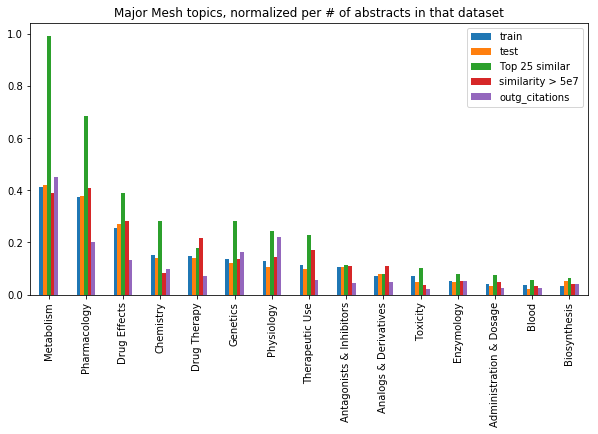

In [234]:
Qualifiers_norm_per_articles.iloc[:15,:].plot(kind='bar',figsize=(10,5), title = 'Major Mesh topics, normalized per # of abstracts in that dataset')

### Mine publication types??? 


In [71]:
records['PubmedArticle'][0]['MedlineCitation']['Article']['PublicationTypeList']

[StringElement('Comparative Study', attributes={u'UI': u'D003160'}), StringElement('Journal Article', attributes={u'UI': u'D016428'})]